In [1]:
# Improve by ChatGPT & GitHub Copilot

# Running the requierements.ipynb
%run /bettik/PROJECTS/pr-data-ocean/riverama/Notebooks/requierements.ipynb

# Loading the data 
%run data_loading.ipynb



Exception: File `'requierements.ipynb'` not found.

# Exercises on CALEDO

## 2D Plotting

### Plot the SSH, U and V 2D fields at a given date (e.g. 15th May) on the same plot.

/tmp/ipykernel_337793/2380802195.py:25: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ssh_plot = ax.pcolormesh(lon, lat, ssh.where(~np.isnan(ssh), np.nan), shading='auto', cmap=cmocean.cm.deep, vmin=colorbar_min, vmax=colorbar_max)


ValueError: 'x' values must be equally spaced

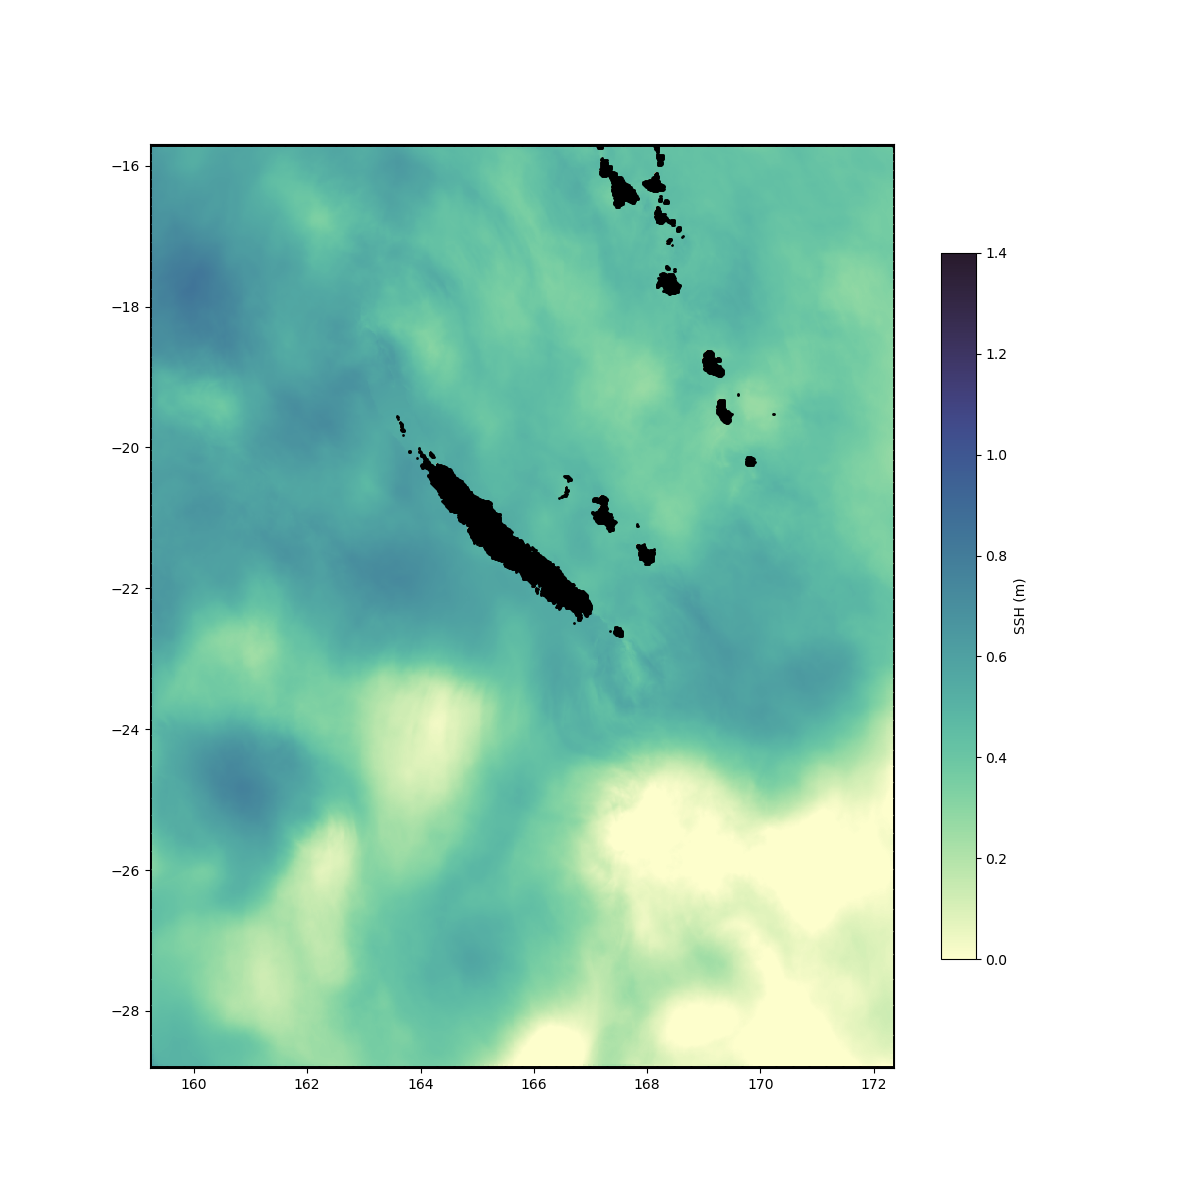

In [3]:
# Assuming SSH_01, SSU_01, and SSV_01 are loaded datasets and 'date' is the selected date
date = '2014-01-15T00:30:00'
ssh = SSH_01.sel(time_counter=date)['zos']  # SSH data
u = SSU_01.sel(time_counter=date)['uos']  # SSU data
v = SSV_01.sel(time_counter=date)['vos']  # SSV data

# Define fixed colorbar values
colorbar_min = 0  # Set your desired minimum value here
colorbar_max = 1.4   # Set your desired maximum value here

# Calculate the magnitude of the velocity
magnitude = np.sqrt(u**2 + v**2)

# Create a mask for zero magnitude values
zero_magnitude_mask = magnitude == 0

# Extract latitude and longitude coordinates
lat = SSH_01['nav_lat']
lon = SSH_01['nav_lon']

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust figure size as needed

# Plot SSH as the background, applying vmin and vmax here
ssh_plot = ax.pcolormesh(lon, lat, ssh.where(~np.isnan(ssh), np.nan), shading='auto', cmap=cmocean.cm.deep, vmin=colorbar_min, vmax=colorbar_max)
fig.colorbar(ssh_plot, ax=ax, label='SSH (m)', shrink=0.765)

# Plot black dots where the velocity magnitude is zero
ax.scatter(lon.values[zero_magnitude_mask], lat.values[zero_magnitude_mask], color='black', s=1)  # s is the size of the dot

# Adjusting quiver for better visualization and reducing arrowhead size
step_size = 12  # Adjust step size as needed for clarity
quiver_scale = 27  # Adjust scale to control overall arrow size
headlength = 3  # Reduce head length
headwidth = 3  # Reduce head width
headaxislength = 2  # Reduce head axis length
arrow_thickness = 0.1  # Adjust arrow thickness; increase for thicker arrows
arrow_color = 'black'  # Specify arrow color; can be a name, hex, or RGB tuple


# Overlay velocity vectors on the SSH background
ax.quiver(lon[::step_size, ::step_size], lat[::step_size, ::step_size], u[::step_size, ::step_size], v[::step_size, ::step_size], 
           scale=quiver_scale, headlength=headlength, headwidth=headwidth, headaxislength=headaxislength, linewidths=arrow_thickness, color=arrow_color)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('SSH and Velocity Vector Field on January 15, 2014')
ax.set_aspect('equal', adjustable='box')


# Find the maximum velocity for reference
max_velocity = magnitude.max().item()  # Assuming magnitude is a numpy array or similar

# Annotate the reference arrow with the maximum velocity value
# Adjust the position as necessary to fit your plot
ax.text(lon.max() + 2.2, lat.min() - 0.5, f'Vmax {max_velocity:.2f} (m/s)', 
        horizontalalignment='right', verticalalignment='top')



plt.show()


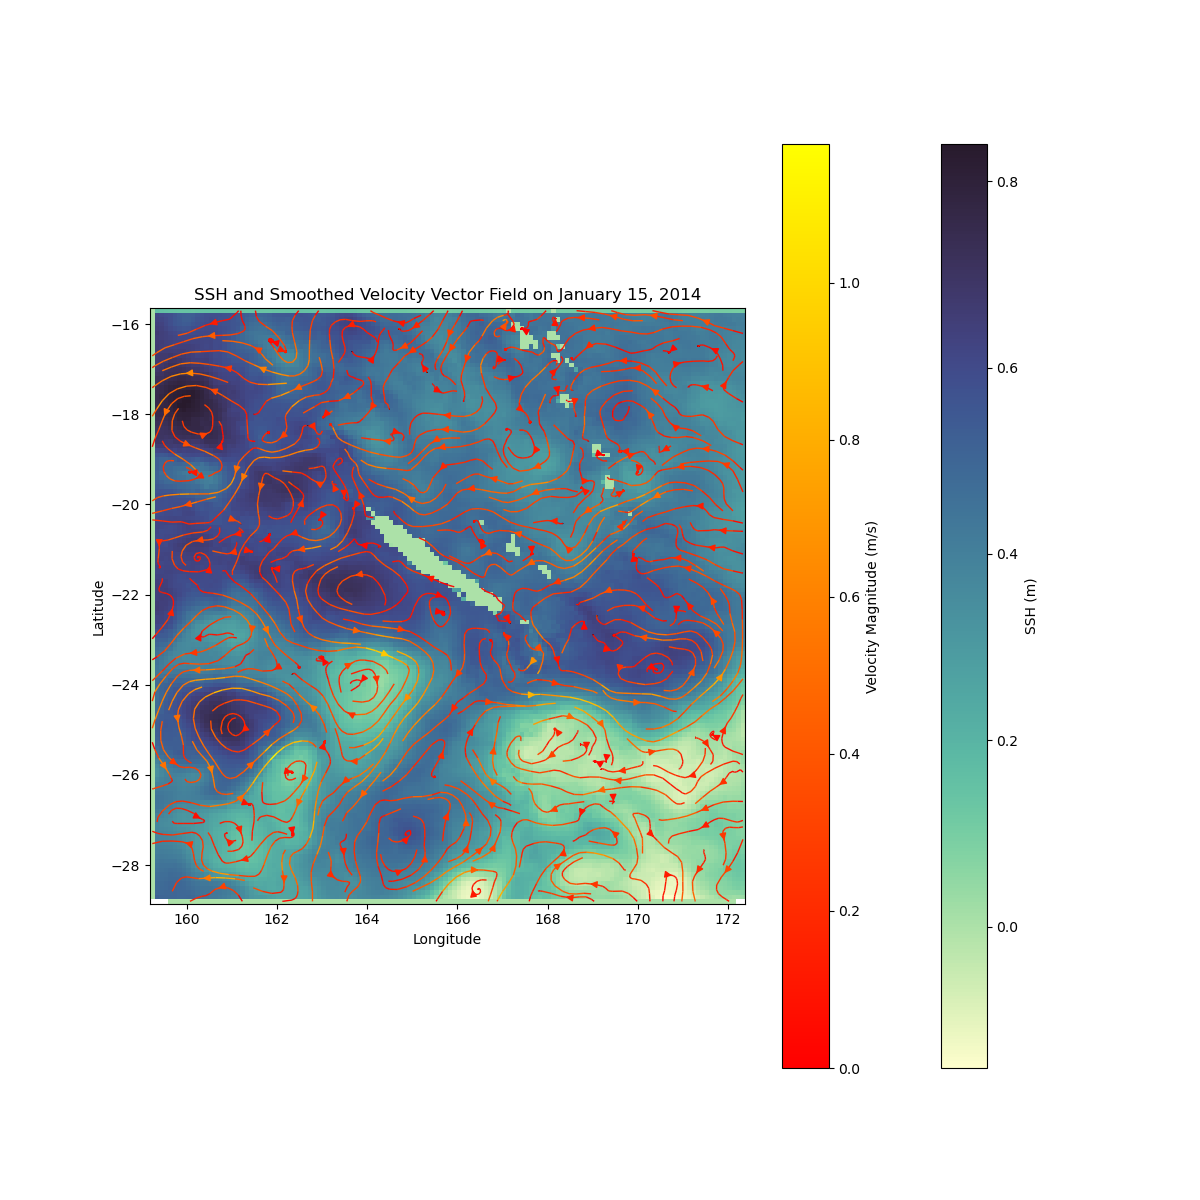

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean
from scipy.interpolate import griddata

# Define target grid for interpolation
# Note: You might need to adjust these ranges and resolutions to fit your data's geographic extent and desired detail.
lon_min, lon_max, lon_step = lon.min(), lon.max(), 0.1
lat_min, lat_max, lat_step = lat.min(), lat.max(), 0.1

lon_regular, lat_regular = np.meshgrid(
    np.arange(lon_min, lon_max, lon_step),
    np.arange(lat_min, lat_max, lat_step)
)

# Interpolate SSH, u, and v onto the regular grid
ssh_regular = griddata((lon.values.flatten(), lat.values.flatten()), ssh.values.flatten(), (lon_regular, lat_regular), method='linear')
u_regular = griddata((lon.values.flatten(), lat.values.flatten()), u.values.flatten(), (lon_regular, lat_regular), method='linear')
v_regular = griddata((lon.values.flatten(), lat.values.flatten()), v.values.flatten(), (lon_regular, lat_regular), method='linear')
magnitude_regular = np.sqrt(u_regular**2 + v_regular**2)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot SSH
ssh_plot = ax.pcolormesh(lon_regular, lat_regular, ssh_regular, shading='auto', cmap=cmocean.cm.deep)
fig.colorbar(ssh_plot, ax=ax, label='SSH (m)')

# Streamplot for Velocity Field
stream = ax.streamplot(lon_regular, lat_regular, u_regular, v_regular, color=magnitude_regular, linewidth=1, cmap='autumn', density=2)
fig.colorbar(stream.lines, ax=ax, label='Velocity Magnitude (m/s)')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('SSH and Smoothed Velocity Vector Field on January 15, 2014')
ax.set_aspect('equal', adjustable='box')

plt.show()


In [9]:
from scipy.interpolate import griddata
import numpy as np

# Assuming lat_original, lon_original, and ssh are your original data

# Convert lat/lon to 1D arrays if not already
lat_flat = lat_original.flatten()
lon_flat = lon_original.flatten()

# Combine lat and lon to a single (N, 2) array for griddata input
points_original = np.vstack((lon_flat, lat_flat)).T

# Flatten SSH data for interpolation
ssh_flat = ssh.flatten()

# Create new target grid for interpolation
lat_new = np.arange(np.min(lat_original), np.max(lat_original), 0.1)
lon_new = np.arange(np.min(lon_original), np.max(lon_original), 0.1)
lon_grid_new, lat_grid_new = np.meshgrid(lon_new, lat_new)

# Flatten new grid for griddata target points
points_new = np.vstack((lon_grid_new.ravel(), lat_grid_new.ravel())).T

# Perform interpolation
ssh_interpolated_flat = griddata(points_original, ssh_flat, points_new, method='linear')

# Reshape interpolated data to 2D
ssh_interpolated = ssh_interpolated_flat.reshape(lon_grid_new.shape)

# Now, ssh_interpolated contains your downsampled SSH data


AttributeError: 'DataArray' object has no attribute 'flatten'

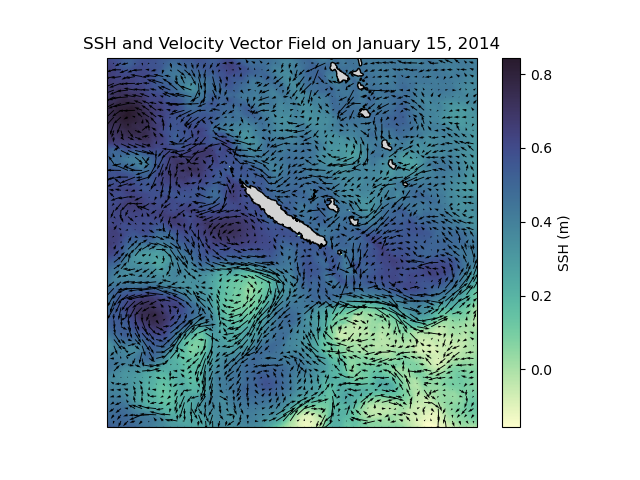

In [14]:
# Define the geographic domain
lon_min, lon_max = 159.23333740234375, 172.34999084472656
lat_min, lat_max = -28.803945541381836, -15.699763298034668

# Define the projection
projection = ccrs.PlateCarree()

# Create a plot with the specified projection
fig, ax = plt.subplots(#figsize=(12, 8), 
                       subplot_kw={'projection': projection})

# Set the extent of the plot to match the specified domain
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add geographical features with explicit zorder for layering
ax.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', facecolor='lightgray', zorder=2)

# Assuming SSH_01, SSU_01, and SSV_01 are loaded datasets and 'date' is the selected date
date = '2014-01-15T00:30:00'
ssh = SSH_01.sel(time_counter=date)['zos']  # SSH data
u = SSU_01.sel(time_counter=date)['uos']  # SSU data
v = SSV_01.sel(time_counter=date)['vos']  # SSV data

# Extract latitude and longitude coordinates
lat = SSH_01['nav_lat']
lon = SSH_01['nav_lon']

# Plot SSH as the background with adjusted zorder
ssh_plot = ax.pcolormesh(lon, lat, ssh.where(~np.isnan(ssh), np.nan), shading='auto', cmap=cmocean.cm.deep, zorder=0)
fig.colorbar(ssh_plot, ax=ax, label='SSH (m)')

# Adjusting quiver for better visualization
step_size = 15  # Adjust step size as needed for clarity
quiver_scale = 15  # Adjust scale to control overall arrow size

# Overlay velocity vectors on the SSH background with the highest zorder
ax.quiver(lon[::step_size, ::step_size], lat[::step_size, ::step_size], u[::step_size, ::step_size], v[::step_size, ::step_size], 
          scale=quiver_scale, color='black', zorder=1)

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('SSH and Velocity Vector Field on January 15, 2014')
ax.set_aspect('equal', adjustable='box')

plt.show()


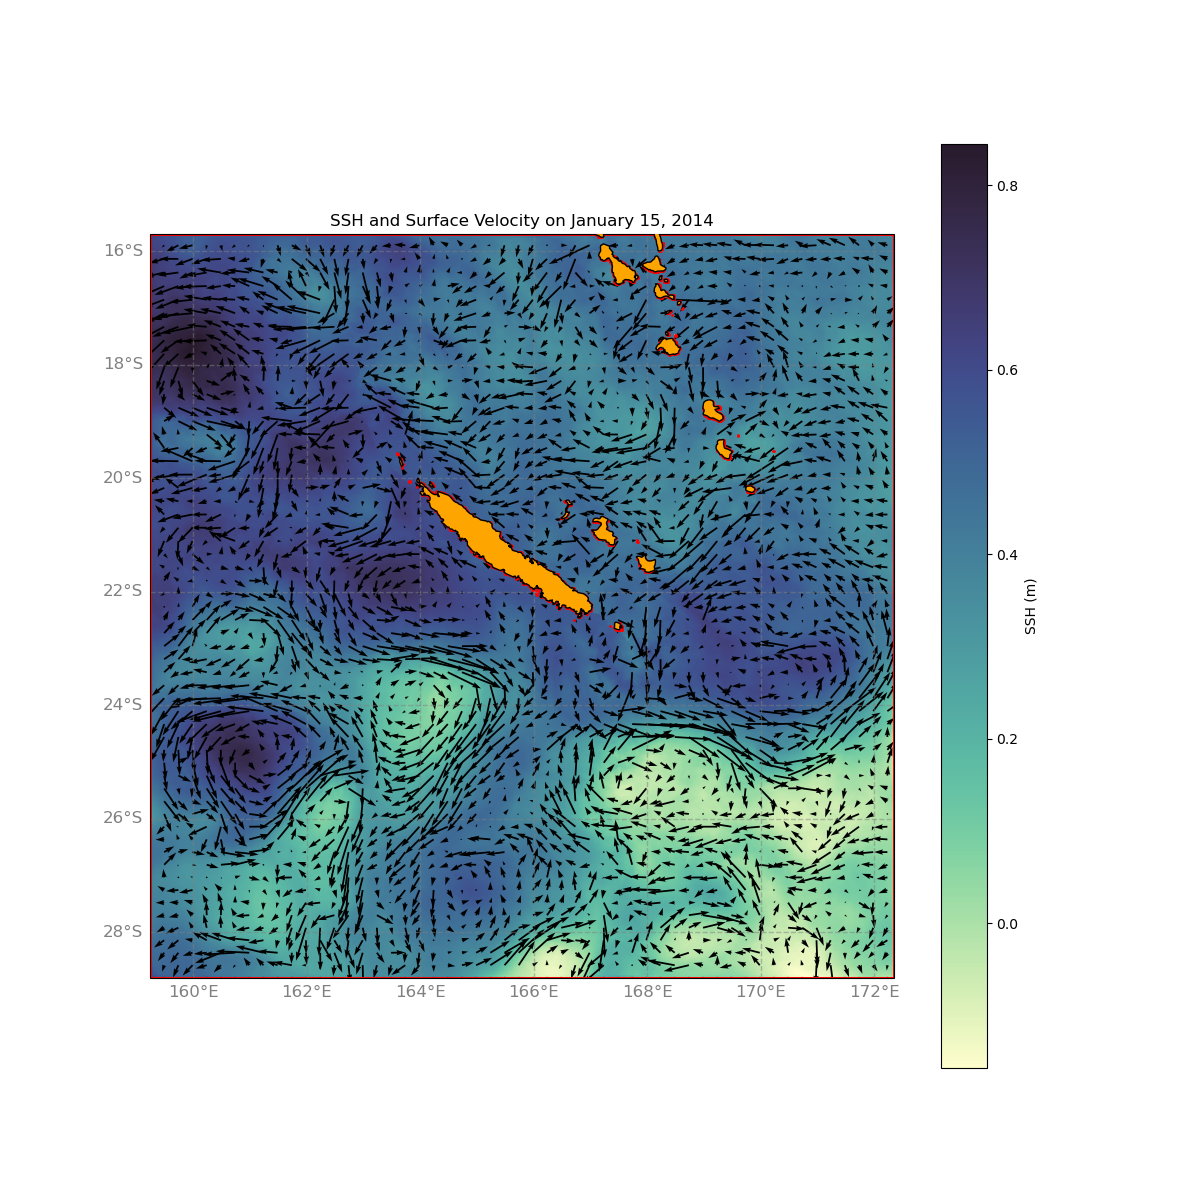

In [8]:
# Define the geographic domain
lon_min, lon_max = 159.23333740234375, 172.34999084472656
lat_min, lat_max = -28.803945541381836, -15.699763298034668

# Define the projection
projection = ccrs.PlateCarree()

# Create a plot with the specified projection
fig, ax = plt.subplots(figsize=(12, 12), 
                       subplot_kw={'projection': projection})

# Set the extent of the plot to match the specified domain
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add geographical features with explicit zorder for layering
ax.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', facecolor='black', zorder=3)

# Assuming SSH_01 is the loaded dataset and 'date' is the selected date
date = '2014-01-15T00:30:00'
ssh = SSH_01.sel(time_counter=date)['zos']  # SSH data
u = SSU_01.sel(time_counter=date)['uos']  # SSU data
v = SSV_01.sel(time_counter=date)['vos']  # SSV data

# Calculate the magnitude of the velocity
magnitude = np.sqrt(u**2 + v**2)

# Extract latitude and longitude coordinates
lat = SSH_01['nav_lat']
lon = SSH_01['nav_lon']

# Create a mask for zero magnitude values
zero_magnitude_mask = magnitude == 0

# Plot SSH as the background with adjusted zorder
ssh_plot = ax.pcolormesh(lon, lat, ssh.where(~np.isnan(ssh), np.nan), shading='auto', cmap=cmocean.cm.deep, zorder=0)
fig.colorbar(ssh_plot, ax=ax, label='SSH (m)')

# Plot red dots where the velocity magnitude is zero
ax.scatter(lon.values[zero_magnitude_mask], lat.values[zero_magnitude_mask], color='red', s=1, zorder=2)  # s is the size of the dot

# Adjusting quiver for better visualization and reducing arrowhead size
step_size = 15  # Adjust step size as needed for clarity
quiver_scale = 15  # Adjust scale to control overall arrow size
headlength = 5  # Reduce head length
headwidth = 3  # Reduce head width
headaxislength = 4.5  # Reduce head axis length

# Overlay velocity vectors on the SSH background
ax.quiver(lon[::step_size, ::step_size], lat[::step_size, ::step_size], u[::step_size, ::step_size], v[::step_size, ::step_size], 
          scale=quiver_scale, headlength=headlength, headwidth=headwidth, headaxislength=headaxislength, color='black', zorder=1)


# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('SSH and Surface Velocity on January 15, 2014')
ax.set_aspect('equal', adjustable='box')

# Add gridlines with labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Disable labels at the top
gl.right_labels = False  # Disable labels on the right
gl.xlabel_style = {'size': 12, 'color': 'gray'}  # Customize the style of the longitude labels
gl.ylabel_style = {'size': 12, 'color': 'gray'}  # Customize the style of the latitude labels

plt.show()
